&copy; Mirko

# Data exploration

In [1]:
import os
import cv2
import yaml
import json
import random
import numpy as np
import pandas as pd
from  datetime import datetime
import matplotlib.pyplot as plt

In [2]:
print(f'origin folder: {os.getcwd()}')

# change working directory to project folder
os.chdir(os.path.join(os.getcwd(), '..'))

print(f'working directory: {os.getcwd()}')


origin folder: /media/mirko/Volume/GITHUB/OpenAcces_RGBD_apple_dataset/notebook
working directory: /media/mirko/Volume/GITHUB/OpenAcces_RGBD_apple_dataset


# Ground truth data to evaluate the CVS at fruit level

In [29]:
# visualize dataset
eval_data = pd.read_csv(os.path.join(os.getcwd(), 'data_ground_truth/evaluation_ground_truth_data.csv'))
eval_data

ID  plant  17/06/2022  20/06/2022  23/06/2022  30/06/2022  07/07/2022  \
0    7      1       39.60         NaN       42.12       45.84         NaN   
1    8      1       50.39         NaN       52.85       57.77       58.97   
2    9      1       48.39         NaN       51.83       56.23         NaN   
3   10      1         NaN       44.38       50.61       54.77         NaN   
4   11      1       46.00       47.27       49.78       54.76       55.49   
5   12      1       41.78       44.67         NaN       48.32       53.61   
6   13      1       45.90         NaN       49.79       53.57       60.24   
7   14      1       44.75       44.11       47.73         NaN       53.22   
8   15      1       42.64         NaN       45.69       47.64       56.61   
9   16      1         NaN       46.49       53.90         NaN       54.94   
10  17      1       41.67         NaN       43.49       47.03         NaN   
11  18      1       45.32         NaN       48.98       53.00       52.31   
12  32      2       48.05         NaN       51.80       55.69         NaN   
13  33      2       47.00       51.67         NaN       55.18       60.93   
14  34      2       45.01       50.25         NaN         NaN       59.35   
15  35      2       42.31       48.55         NaN       49.23       55.89   
16  36      2       45.69       48.86       48.94       52.40       57.94   
17  37      2       43.55         NaN       46.96       49.39       53.60   
18  38      2       47.39       48.20       50.95       56.84       56.94   
19  39      2       41.94         NaN       45.72       50.47       54.28   
20  40      2         NaN       44.41       51.81       54.57         NaN   
21  41      2       43.81         NaN       45.06       51.84         NaN   
22  42      2       51.89         NaN       57.42       60.76         NaN   
23  43      2       43.50       47.55       47.05       50.12       55.90   
24  TB      1       65.46       65.46       65.46       65.46       65.46   
25  TB      2       65.46       65.46       65.46       65.46       65.46   

    15/07/2022  20/07/2022  01/08/2022  11/08/2022  24/08/2022  30/08/2022  \
0        53.74       55.88       60.25       64.10       68.86       70.91   
1        65.39       67.22       72.11       75.76       81.62       84.48   
2        62.83       64.84       70.22       73.09       77.58       79.70   
3        59.85       62.52       67.44       70.42       74.03       77.51   
4        62.15       64.26       69.34       72.47       76.49       78.49   
5        56.60       59.46       63.25       66.21       71.31       73.70   
6          NaN       62.44       65.76       68.68       72.65       74.56   
7        58.87       60.43       65.67       69.01       73.27       76.53   
8        57.36       59.71       62.82       67.19       71.22       74.38   
9        65.54       65.09       74.87       74.28       79.28       80.87   
10       55.27       57.64       62.91       66.83       72.04       75.69   
11       60.14       62.32       67.62       70.92       76.27       76.69   
12       63.80       65.24       69.82       72.28       76.30       78.09   
13       62.85       65.33       69.46       71.56       75.67       77.08   
14       60.64       62.99       67.84       69.29       75.90         NaN   
15       56.86       58.25       62.00       64.05       68.87       71.06   
16       60.06       62.09       68.15       69.46       73.45       78.76   
17       58.66       61.90       65.12       67.99       70.81       75.81   
18       62.81       66.34       70.39       73.08       77.46       80.17   
19       56.34       58.77       62.97       66.15       70.25       73.95   
20       61.87       63.91       68.34       70.90       74.24       78.55   
21       59.26       61.68       65.52       68.11       71.53       74.65   
22       69.08       70.75       75.71       79.22       82.86       86.01   
23       55.98       58.38       62.14       65.21  

In [30]:
print(f'number of trees: {eval_data.plant.unique().size}')
print(f'scanning dates: {eval_data.columns[2:].size}')
print('\nMissing evaluation data:')
df = eval_data.iloc[:, 2:]
for idx, date in enumerate(df):
    print(f'-- {date} | null values {df.isnull().sum().iloc[idx]}')


number of trees: 2
scanning dates: 17

Missing evaluation data:
-- 17/06/2022 | null values 3
-- 20/06/2022 | null values 12
-- 23/06/2022 | null values 4
-- 30/06/2022 | null values 3
-- 07/07/2022 | null values 8
-- 15/07/2022 | null values 1
-- 20/07/2022 | null values 0
-- 01/08/2022 | null values 0
-- 11/08/2022 | null values 0
-- 24/08/2022 | null values 0
-- 30/08/2022 | null values 1
-- 07/09/2022 | null values 0
-- 16/09/2022 | null values 0
-- 21/09/2022 | null values 1
-- 28/09/2022 | null values 0
-- 03/10/2022 | null values 1
-- 12/10/2022 | null values 0


# Applicative Ground truth data to evaluate the CVS at field level

In [31]:
# visualize dataset
applicative_data = pd.read_csv(os.path.join(os.getcwd(), 'data_ground_truth/applicative_ground_truth_data.csv'))
applicative_data

ID  plant  17/06/2022  20/06/2022  23/06/2022  30/06/2022  07/07/2022  \
0    1    NaN       45.75       55.22       48.11       53.02       65.76   
1    2    NaN       42.57       49.39       45.20       49.28       56.55   
2    3    NaN       48.28       47.45       50.89       54.55       57.66   
3    4    NaN       44.62       46.14       47.18       50.56       55.08   
4    5    NaN       46.29       45.70       52.87       54.90       53.76   
5    6    NaN       43.72       48.39       45.45       48.94       56.00   
6    7    1.0       39.60       49.53       42.12       45.84       58.99   
7    8    1.0       50.39       48.52       52.85       57.77       58.97   
8    9    1.0       48.39       46.26       51.83       56.23       52.09   
9   10    1.0       45.20       44.38       50.61       54.77       51.51   
10  11    1.0       46.00       47.27       49.78       54.76       55.49   
11  12    1.0       41.78       44.67       42.35       48.32       53.61   
12  13    1.0       45.90       50.46       49.79       53.57       60.24   
13  14    1.0       44.75       44.11       47.73         NaN       53.22   
14  15    1.0       42.64       49.42       45.69       47.64       56.61   
15  16    1.0       48.41       46.49       53.90       59.59       54.94   
16  17    1.0       41.67       55.34       43.49       47.03       63.86   
17  18    1.0       45.32       44.56       48.98       53.00       52.31   
18  19    NaN       45.04       46.23       47.68       51.73       56.62   
19  20    NaN       42.40       41.49       45.21       52.41       49.42   
20  21    NaN       50.64       43.01       53.33       58.19       52.72   
21  22    NaN       45.58       48.73       49.13       52.02       58.60   
22  23    NaN       42.47       50.02       44.70       49.08       58.40   
23  24    NaN       46.38       46.61       50.09       53.99       57.05   
24  25    NaN       43.93       45.40       47.62       52.54       53.52   
25  26    NaN       54.04       47.93       57.96       61.98       56.32   
26  27    NaN       48.27       43.93       49.47       54.59       52.56   
27  28    NaN       46.13       48.79       50.27       54.36       59.06   
28  29    NaN       44.84       45.96       47.67       51.51       54.05   
29  30    NaN       44.15       51.44       47.46       50.73       56.21   
30  31    NaN       46.95       44.75       49.46         NaN       52.06   
31  32    2.0       48.05       41.31       51.80       55.69       49.25   
32  33    2.0       47.00       51.67       50.75       55.18       60.93   
33  34    2.0       45.01       50.25       45.68         NaN       59.35   
34  35    2.0       42.31       48.55       45.89       49.23       55.89   
35  36    2.0       45.69       48.86       48.94       52.40       57.94   
36  37    2.0       43.55       41.85       46.96       49.39       53.60   
37  38    2.0       47.39       48.20       50.95       56.84       56.94   
38  39    2.0       41.94       47.71       45.72       50.47       54.28   
39  40    2.0       48.53       44.41       51.81       54.57       51.31   
40  41    2.0       43.81       53.63       45.06       51.84       62.45   
41  42    2.0       51.89       42.45       57.42       60.76       50.18   
42  43    2.0       43.50       47.55       47.05       50.12       55.90   
43  44    NaN       44.29       46.50       52.67       52.87       53.73   
44  45    NaN       43.34       44.57       43.14       47.15       53.93   
45  46    NaN       42.77       51.56       46.25       51.01       60.84   
46  47    NaN       47.17       45.71       50.67       55.59       56.65   
47  48    NaN       48.89       43.85       50.95       56.22       50.36   
48  49    NaN       46.96       47.19       50.90       56.01       57.49   
49  50    NaN       46.39       55.39       47.52       51.53         NaN   
50  TB    1.0       65.46       65.46       65.46       65.46       65.46   


In [32]:
print(f'scanning dates: {applicative_data.columns[2:].size}')
print('\nMissing applicative data:')
df = applicative_data.iloc[:,2:]
for idx, date in enumerate(df.columns):
    print(f'-- {date} | null values {df.isnull().sum().iloc[idx] if df.isnull().sum().iloc[idx] != 0 else "any"}')


scanning dates: 17

Missing applicative data:
-- 17/06/2022 | null values any
-- 20/06/2022 | null values any
-- 23/06/2022 | null values any
-- 30/06/2022 | null values 3
-- 07/07/2022 | null values 1
-- 15/07/2022 | null values any
-- 20/07/2022 | null values any
-- 01/08/2022 | null values any
-- 11/08/2022 | null values any
-- 24/08/2022 | null values any
-- 30/08/2022 | null values any
-- 07/09/2022 | null values any
-- 16/09/2022 | null values any
-- 21/09/2022 | null values any
-- 28/09/2022 | null values any
-- 03/10/2022 | null values 1
-- 12/10/2022 | null values 4


# Fruits measured in each date


Evaluation dataset:
-- 17/06/2022 | data count 21
-- 20/06/2022 | data count 12
-- 23/06/2022 | data count 20
-- 30/06/2022 | data count 21
-- 07/07/2022 | data count 16
-- 15/07/2022 | data count 23
-- 20/07/2022 | data count 24
-- 01/08/2022 | data count 24
-- 11/08/2022 | data count 24
-- 24/08/2022 | data count 24
-- 30/08/2022 | data count 23
-- 07/09/2022 | data count 24
-- 16/09/2022 | data count 24
-- 21/09/2022 | data count 23
-- 28/09/2022 | data count 24
-- 03/10/2022 | data count 23
-- 12/10/2022 | data count 24


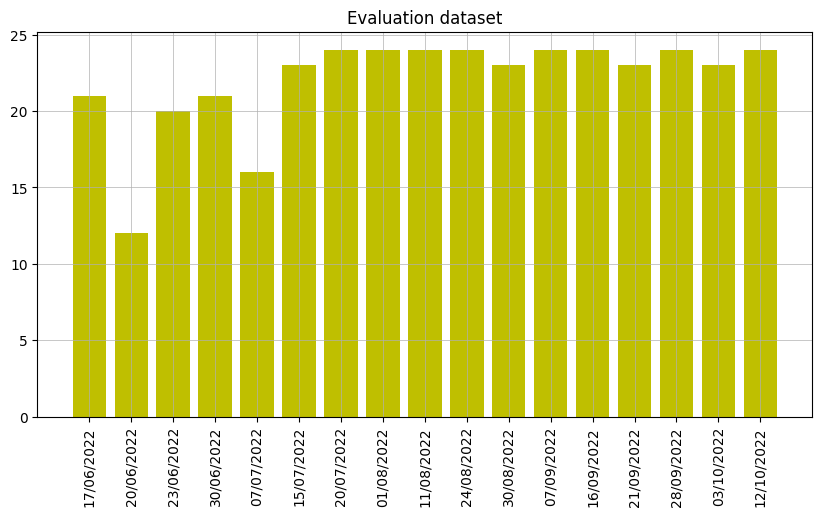


Applicative dataset:
-- 17/06/2022 | data count 50
-- 20/06/2022 | data count 50
-- 23/06/2022 | data count 50
-- 30/06/2022 | data count 47
-- 07/07/2022 | data count 49
-- 15/07/2022 | data count 50
-- 20/07/2022 | data count 50
-- 01/08/2022 | data count 50
-- 11/08/2022 | data count 50
-- 24/08/2022 | data count 50
-- 30/08/2022 | data count 50
-- 07/09/2022 | data count 50
-- 16/09/2022 | data count 50
-- 21/09/2022 | data count 50
-- 28/09/2022 | data count 50
-- 03/10/2022 | data count 49
-- 12/10/2022 | data count 46


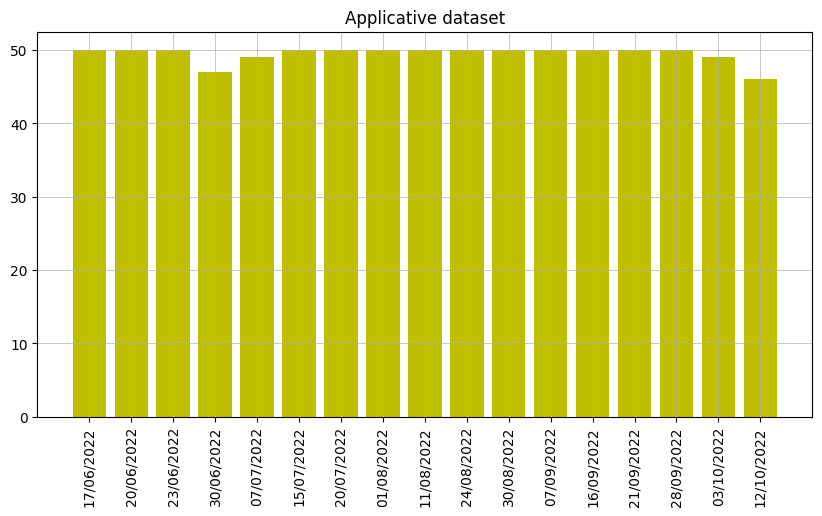

In [34]:
titles= ['Evaluation dataset', 'Applicative dataset']
for i, data in enumerate([eval_data, applicative_data]):
    fig = plt.figure(figsize=(10, 5))
    print(f'\n{titles[i]}:')
    plt.title(f'{titles[i]}')
    df = data.loc[data.ID != 'TB'].iloc[:,2:].copy()
    for idx, date in enumerate(df):
        data_count = df.notnull().sum().iloc[idx]
        print(f'-- {date} | data count {df.notnull().sum().iloc[idx]}')
        plt.bar(date, data_count , color='y')
    plt.grid(lw=.5)
    plt.xticks(rotation=90)
    plt.show()

# Visualize reference size data
The data values represent the manually measured fruit sizes (cultivar Fuji apple). 
\
The tool used to measure fruit size is a digital caliper.


Evaluation dataset:
Fruit tags: ['18', '15', '41', '16', '35', '11', 'TB', '9', '7', '14', '13', '42', '8', '32', '10', '33', '40', '38', '12', '37', '39', '43', '36', '17', '34']


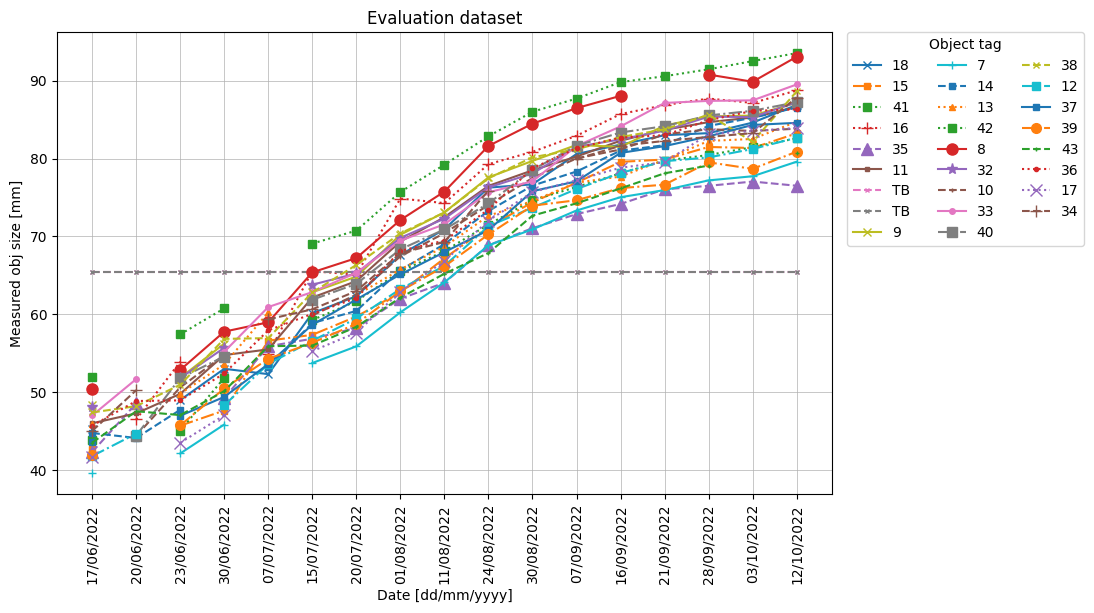


Applicative dataset:
Fruit tags: ['18', '15', '3', '41', '27', '47', '16', '30', '35', '26', '20', '46', '11', '4', '50', 'TB', '49', '44', '9', '7', '14', '1', '13', '42', '8', '32', '10', '19', '23', '29', '45', '31', '33', '28', '21', '40', '6', '12', '38', '22', '24', '2', '37', '39', '43', '36', '17', '48', '25', '5', '34']


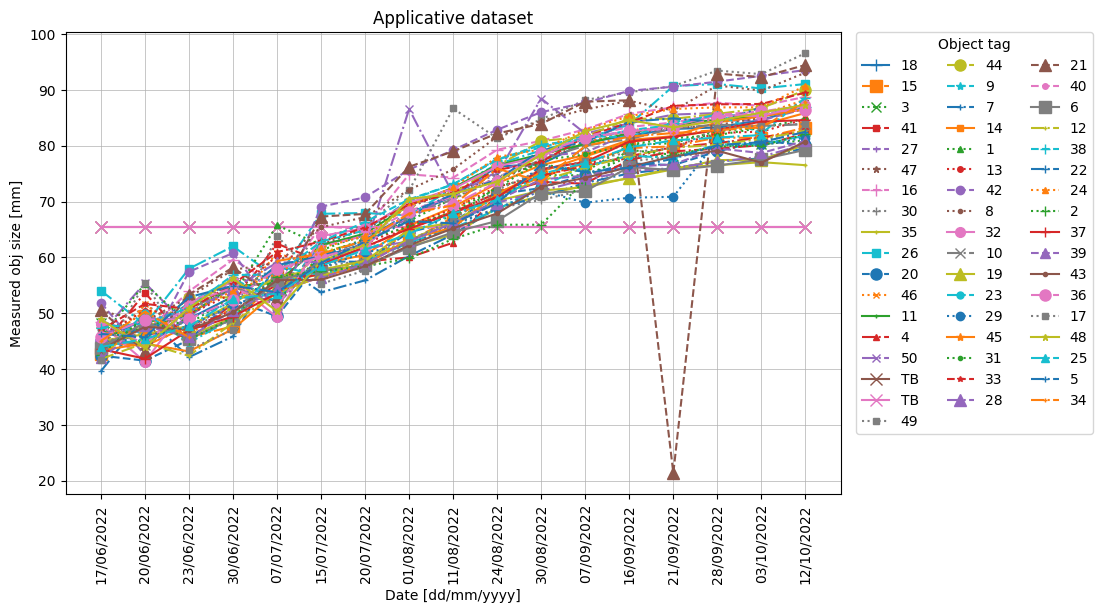

In [35]:
titles= ['Evaluation dataset', 'Applicative dataset']
for i, data in enumerate([eval_data, applicative_data]):
    fig = plt.figure(figsize=(10, 6))
    print(f'\n{titles[i]}:')
    plt.title(f'{titles[i]}')

    fruit_ids = list(set(data.ID.unique()))
    # fruit_ids.remove('TB')
    print(f'Fruit tags: {fruit_ids}')
    df = data.copy()

    for fruit in fruit_ids:
        timeserie = df.loc[df.ID == fruit]

        dates = []
        values = []
        for date in timeserie.columns[2:]:
            dates.append(date)
            values.append(timeserie[date].values)

        # Generate random line style and marker pair
        linestyle = random.choice(['-', '--', '-.', ':'])
        marker = random.choice(['o', 's', '^', 'x', '*', '+'])
        size = random.choice([3, 4, 5, 6, 7, 8])
    
        plt.plot(dates, values, label=fruit, linestyle=linestyle, marker=marker, markersize=size)

    # some aestethics
    plt.grid(lw= .5)
    plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0, title='Object tag', ncol=3)
    plt.xlabel("Date [dd/mm/yyyy]")
    plt.ylabel("Measured obj size [mm]")
    plt.xticks(rotation='vertical')
    plt.show()

# visualize image data

For each survey date, a file containing labels, a depth and a color matrix are contained. Images were generated with and [Intel realsense D435i stereocamera](https://www.intelrealsense.com/depth-camera-d435i/)

In [68]:
for cam_obj_distance in os.listdir(os.path.join(os.getcwd(), 'dataset')):
    print(f'Dist: {cam_obj_distance}')

    for point_of_view in os.listdir(os.path.join(os.getcwd(), f'dataset/{cam_obj_distance}')):
        print(f'-- {point_of_view}')

        for date in os.listdir(os.path.join(os.getcwd(), f'dataset/{cam_obj_distance}/{point_of_view}')):
            print(f'        {date}')

            for file in os.listdir(os.path.join(os.getcwd(), f'dataset/{cam_obj_distance}/{point_of_view}/{date}')):
                print(f'            + {file}')

Dist: 1_0m
-- HIGH
        2022_06_17
            + P1.json
            + P1.npy
            + P1.png
            + P2.json
            + P2.npy
            + P2.png
        2022_06_20
            + P1.json
            + P1.npy
            + P1.png
            + P2.json
            + P2.npy
            + P2.png
        2022_06_23
            + P1.json
            + P1.npy
            + P1.png
            + P2.json
            + P2.npy
            + P2.png
        2022_06_30
            + P1.json
            + P1.npy
            + P1.png
            + P2.json
            + P2.npy
            + P2.png
        2022_07_07
            + P1.json
            + P1.npy
            + P1.png
            + P2.json
            + P2.npy
            + P2.png
        2022_07_15
            + P1.json
            + P1.npy
            + P1.png
            + P2.json
            + P2.npy
            + P2.png
        2022_07_20
            + P1.json
            + P1.npy
            + P1.png
            + P2

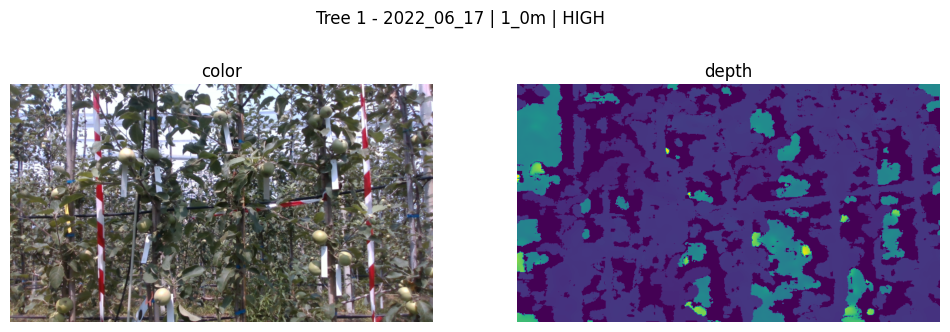

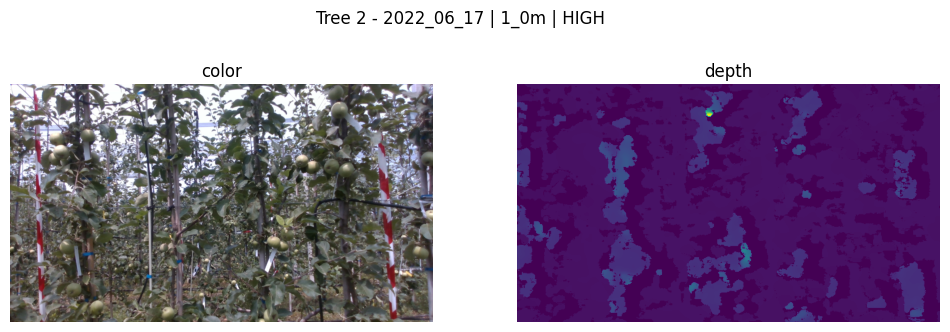

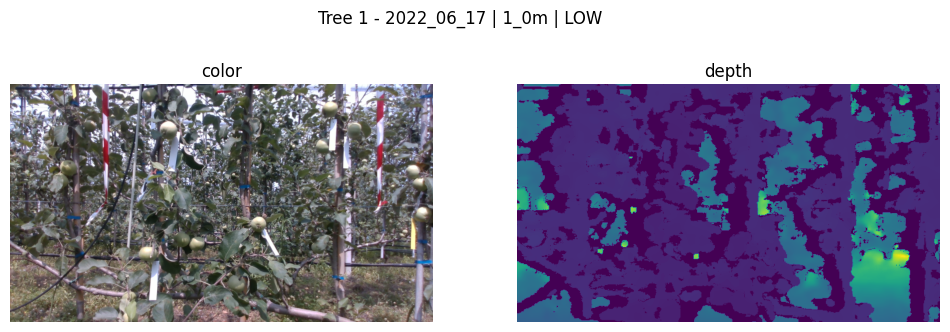

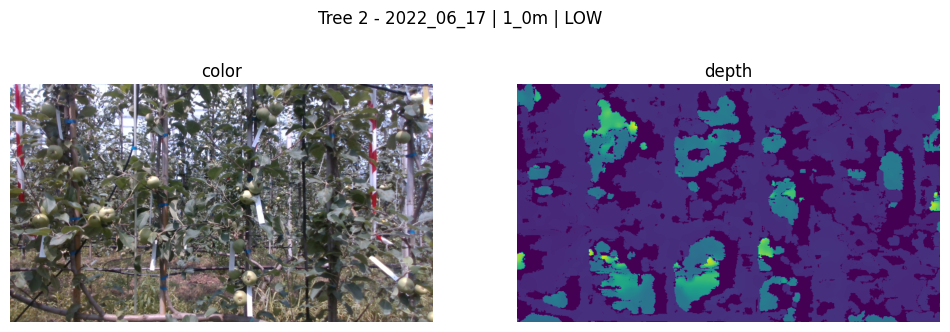

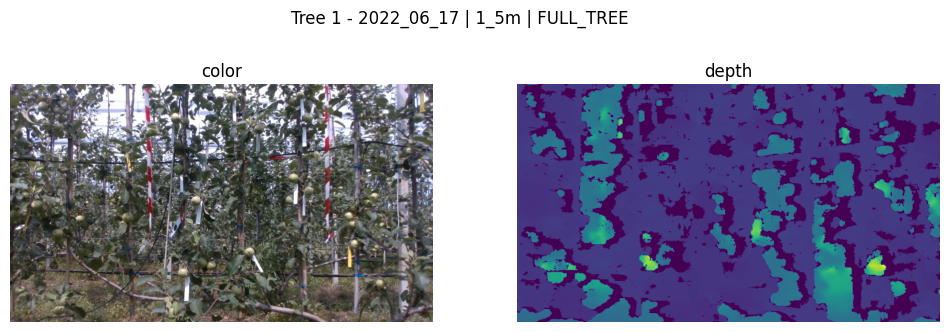

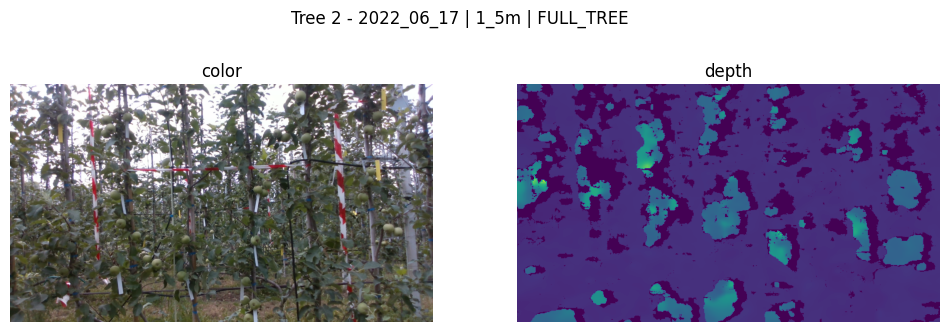

In [72]:
DATE_LIMIT = 1  # out of 17

for cam_obj_distance in os.listdir(os.path.join(os.getcwd(), 'dataset')):
    for point_of_view in os.listdir(os.path.join(os.getcwd(), f'dataset/{cam_obj_distance}')):
        for date in os.listdir(os.path.join(os.getcwd(), f'dataset/{cam_obj_distance}/{point_of_view}'))[:DATE_LIMIT]:
            for file in os.listdir(os.path.join(os.getcwd(), f'dataset/{cam_obj_distance}/{point_of_view}/{date}')):

                if file.endswith('png'):
                    fig, ax = plt.subplots(1,2, figsize=(12, 4))
                    bgr =  cv2.imread(os.path.join(os.getcwd(), f'dataset/{cam_obj_distance}/{point_of_view}/{date}/{file}'))
                    depth_Mat = np.load(os.path.join(os.getcwd(), f'dataset/{cam_obj_distance}/{point_of_view}/{date}/{file[:-4] + ".npy"}'))  # meters
                    ax[0].set_title('color')
                    ax[0].imshow(cv2.resize(bgr[:,:,::-1], None, fx=0.5, fy=0.5))
                    ax[0].axis('off')
                    ax[1].set_title('depth')
                    ax[1].imshow(cv2.resize(depth_Mat, None, fx=0.5, fy=0.5))
                    ax[1].axis('off')

                    plt.suptitle(f'{"Tree 1" if file.find("P1") != -1 else "Tree 2"} - {date} | {cam_obj_distance} | {point_of_view}')
                    plt.show()

## labels

In [71]:
DATE_LIMIT = 1  # out of 17

for cam_obj_distance in os.listdir(os.path.join(os.getcwd(), 'dataset')):
    for point_of_view in os.listdir(os.path.join(os.getcwd(), f'dataset/{cam_obj_distance}')):
        for date in os.listdir(os.path.join(os.getcwd(), f'dataset/{cam_obj_distance}/{point_of_view}'))[:DATE_LIMIT]:
            for file in os.listdir(os.path.join(os.getcwd(), f'dataset/{cam_obj_distance}/{point_of_view}/{date}')):

                if file.endswith('json'):
                    json_label = os.path.join(os.getcwd(), f'dataset/{cam_obj_distance}/{point_of_view}/{date}/{file}')
                    # Open the file in read mode
                    with open(json_label, 'r') as json_label:
                        # Load the JSON data from the file
                        labelled_data = json.load(json_label)
                    
                        # parse data
                        for obj in labelled_data['objects']:
                            if  obj['description'] != '':  # others or unlabelled objects
                                obj_id = obj['description'] 
                                obj_detector = obj['classTitle']
                                obj_coords = obj['points']['exterior']

                                print(f'ID: {obj_id} - Labeller: {obj_detector} - obj coordinates: {obj_coords}')


ID: 7 - Labeller: apple_Y5L_std_bbox - obj coordinates: [[1405, 99], [1462, 155]]
ID: 14 - Labeller: apple_Y5L_std_bbox - obj coordinates: [[617, 287], [680, 347]]
ID: 16 - Labeller: apple_Y5L_std_bbox - obj coordinates: [[575, 607], [644, 673]]
ID: 11 - Labeller: apple_Y5L_std_bbox - obj coordinates: [[922, 120], [987, 186]]
ID: 10 - Labeller: apple_Y5L_std_bbox - obj coordinates: [[1490, 759], [1552, 825]]
ID: 9 - Labeller: apple_Y5L_std_bbox - obj coordinates: [[1374, 662], [1441, 729]]
ID: 12 - Labeller: apple_Y5L_std_bbox - obj coordinates: [[1135, 354], [1201, 427]]
ID: 15 - Labeller: apple_Y5L_std_bbox - obj coordinates: [[494, 290], [568, 371]]
ID: 17 - Labeller: apple_Y5L_std_bbox - obj coordinates: [[654, 924], [730, 1009]]
ID: 8 - Labeller: apple_Y5L_std_bbox - obj coordinates: [[1461, 246], [1531, 317]]
ID: 7 - Labeller: apple_manual_annot - obj coordinates: [[1404, 97], [1464, 154]]
ID: 8 - Labeller: apple_manual_annot - obj coordinates: [[1458, 245], [1533, 318]]
ID: 9 - 

# Number of fruits photographed each day with a valid Ground Truth

In [36]:
# fig, ax = plt.subplots(1, 2, figsize=(15, 5))

TOT_CNT = 0

labels_dict = {'apple_manual_annot' : 0, 'apple_Y5L_std_bbox' : 0, 'apple_Y5L_trained_bbox' : 0, 'TB_manual_annot' : 0, 'TB_Y5L_std_bbox' : 0, 'TB_Y5L_trained_bbox' : 0}
dates_cnt = {'labels_count' : {}}


for cam_obj_distance in os.listdir(os.path.join(os.getcwd(), 'dataset')):
    for point_of_view in os.listdir(os.path.join(os.getcwd(), f'dataset/{cam_obj_distance}')):
        for date in os.listdir(os.path.join(os.getcwd(), f'dataset/{cam_obj_distance}/{point_of_view}')):
            y, m, d = date.split('_')
            date_obj = f'{d}/{m}/{y}'
            for file in os.listdir(os.path.join(os.getcwd(), f'dataset/{cam_obj_distance}/{point_of_view}/{date}')):
                    if file.endswith('json'):
                        json_label = os.path.join(os.getcwd(), f'dataset/{cam_obj_distance}/{point_of_view}/{date}/{file}')
                        # Open the file in read mode
                        with open(json_label, 'r') as json_label:
                            # Load the JSON data from the file
                            labelled_data = json.load(json_label)
                        
                            # parse data
                            for obj in labelled_data['objects']:
                                if obj['description'] != '':
                                
                                    # check for valid label
                                    row_df = eval_data.loc[eval_data.ID == obj['description']].copy()

                                    labeller = obj['classTitle']

                                    for col in row_df.columns[2:]:

                                        if col not in dates_cnt.keys():
                                            dates_cnt[col] = {'HIGH' : {'apple_manual_annot': {'valid' : 0, 'nan' : 0},
                                                                        'apple_Y5L_std_bbox' : {'valid' : 0, 'nan' : 0},
                                                                        'apple_Y5L_trained_bbox' : {'valid' : 0, 'nan' : 0},
                                                                        'TB_manual_annot': {'valid' : 0, 'nan' : 0},
                                                                        'TB_Y5L_std_bbox' : {'valid' : 0, 'nan' : 0},
                                                                        'TB_Y5L_trained_bbox' : {'valid' : 0, 'nan' : 0}},

                                                            'LOW' : {'apple_manual_annot': {'valid' : 0, 'nan' : 0},
                                                                        'apple_Y5L_std_bbox' : {'valid' : 0, 'nan' : 0},
                                                                        'apple_Y5L_trained_bbox' : {'valid' : 0, 'nan' : 0},
                                                                        'TB_manual_annot': {'valid' : 0, 'nan' : 0},
                                                                        'TB_Y5L_std_bbox' : {'valid' : 0, 'nan' : 0},
                                                                        'TB_Y5L_trained_bbox' : {'valid' : 0, 'nan' : 0}},

                                                            'FULL_TREE' : {'apple_manual_annot': {'valid' : 0, 'nan' : 0},
                                                                        'apple_Y5L_std_bbox' : {'valid' : 0, 'nan' : 0},
                                                                        'apple_Y5L_trained_bbox' : {'valid' : 0, 'nan' : 0},
                                                                        'TB_manual_annot': {'valid' : 0, 'nan' : 0},
                                                                        'TB_Y5L_std_bbox' : {'valid' : 0, 'nan' : 0},
                                                                        'TB_Y5L_trained_bbox' : {'valid' : 0, 'nan' : 0}},}
                                        if date_obj == col:
                                            if row_df[col].notna().any():
                                                dates_cnt[col][point_of_view][labeller]['valid'] += 1
                                            else:
                                                dates_cnt[col][point_of_view][labeller]['nan'] += 1
                                            
                                    labels_dict[labeller] += 1

# Convert dictionary to YAML format
out_file = os.path.join(os.getcwd(), 'data_ground_truth/img_labels_summary.yaml')
with open(out_file, 'w') as outfile:
    yaml.dump(dates_cnt, outfile, sort_keys=False)

print(f'Count Data saved in:\n {out_file}')


Count Data saved in:
 /media/mirko/Volume/GITHUB/OpenAcces_RGBD_apple_dataset/data_ground_truth/img_labels_summary.yaml


finished


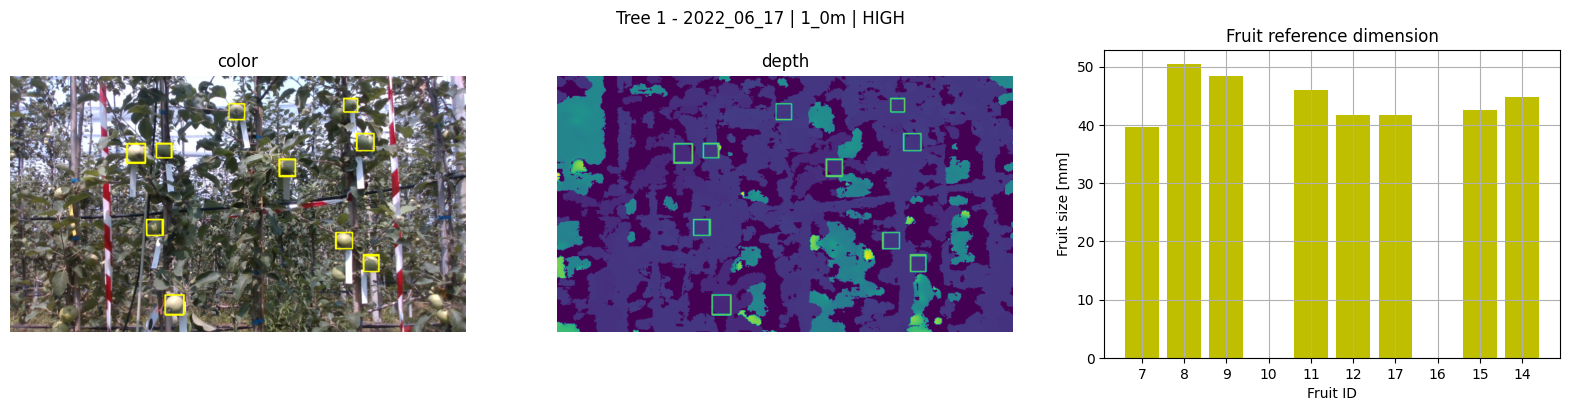

finished


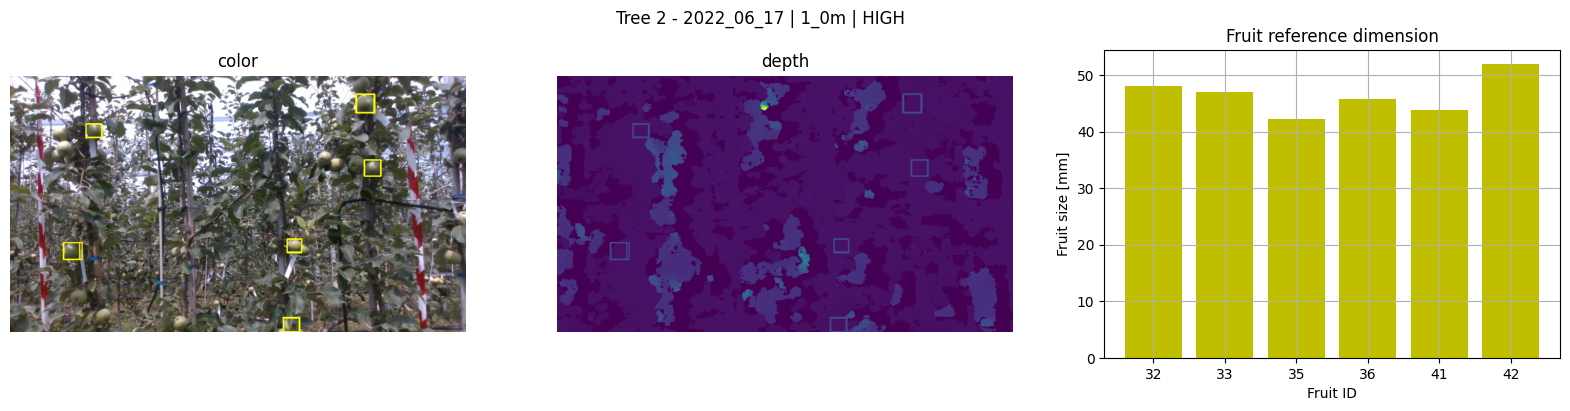

finished


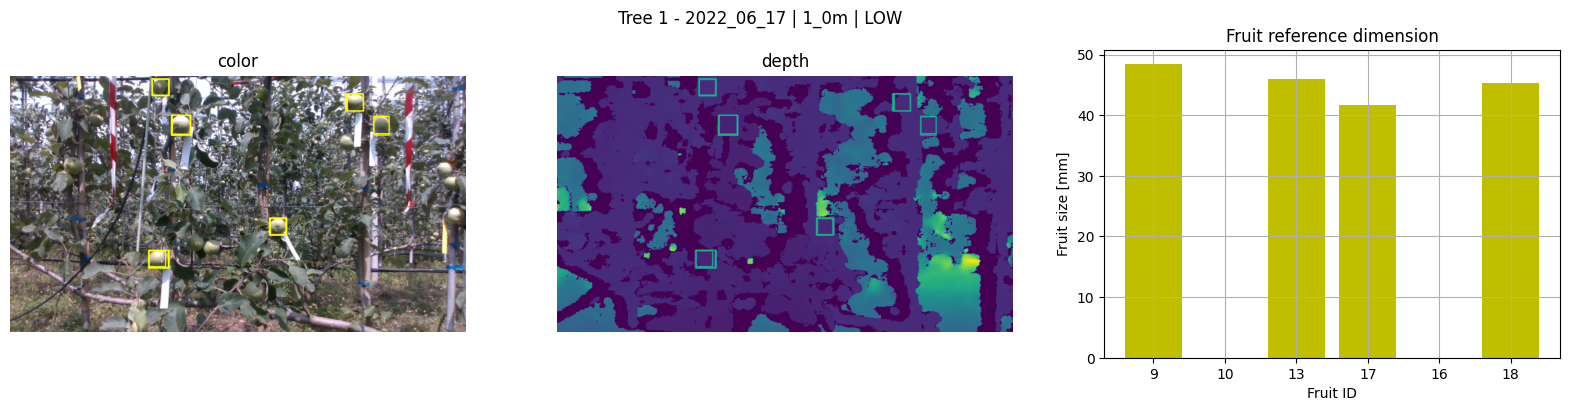

finished


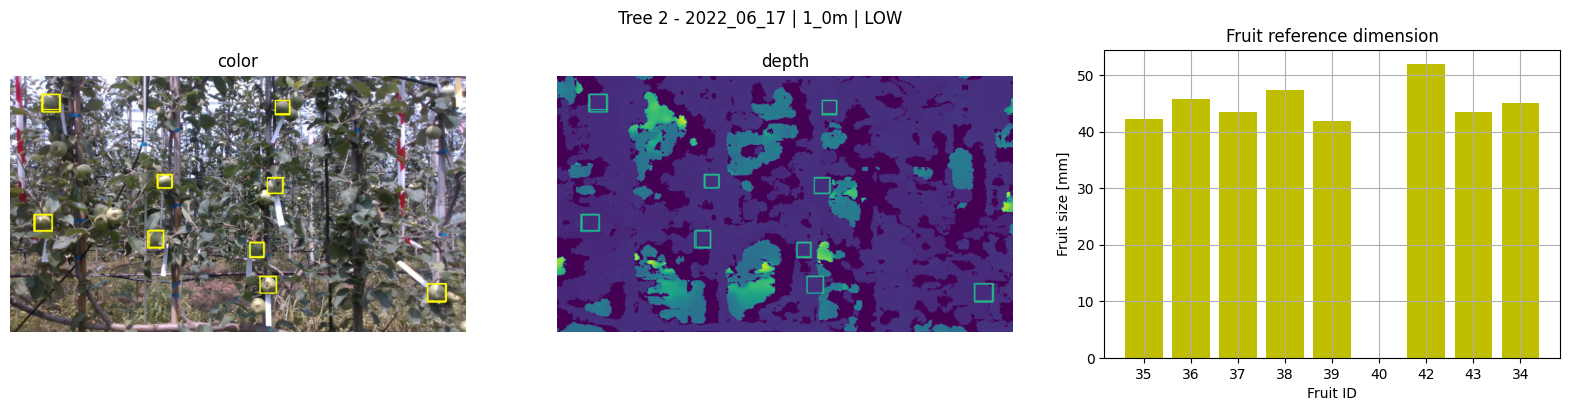

finished


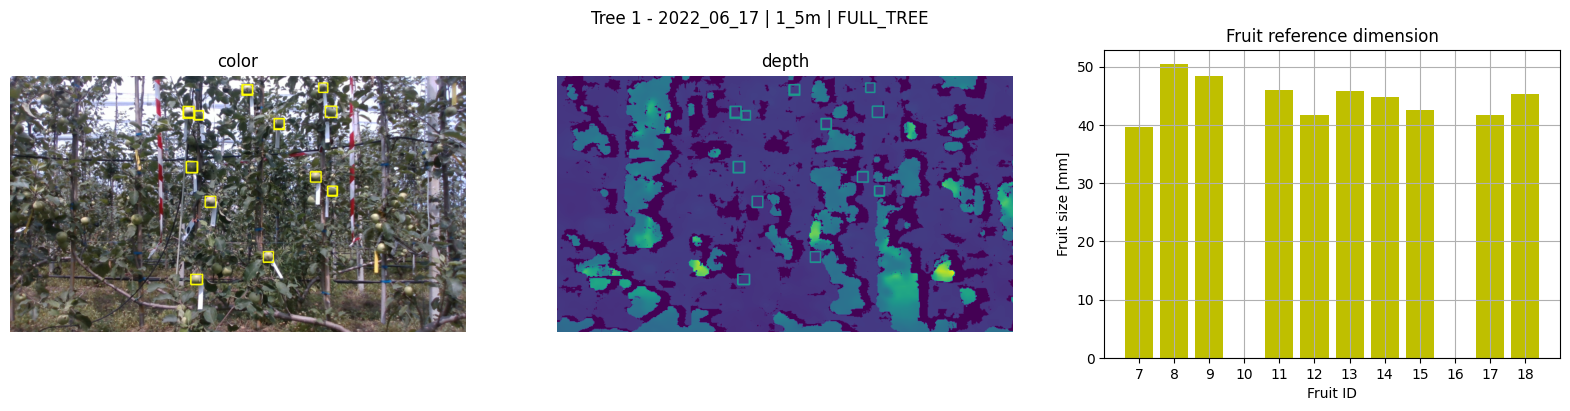

finished


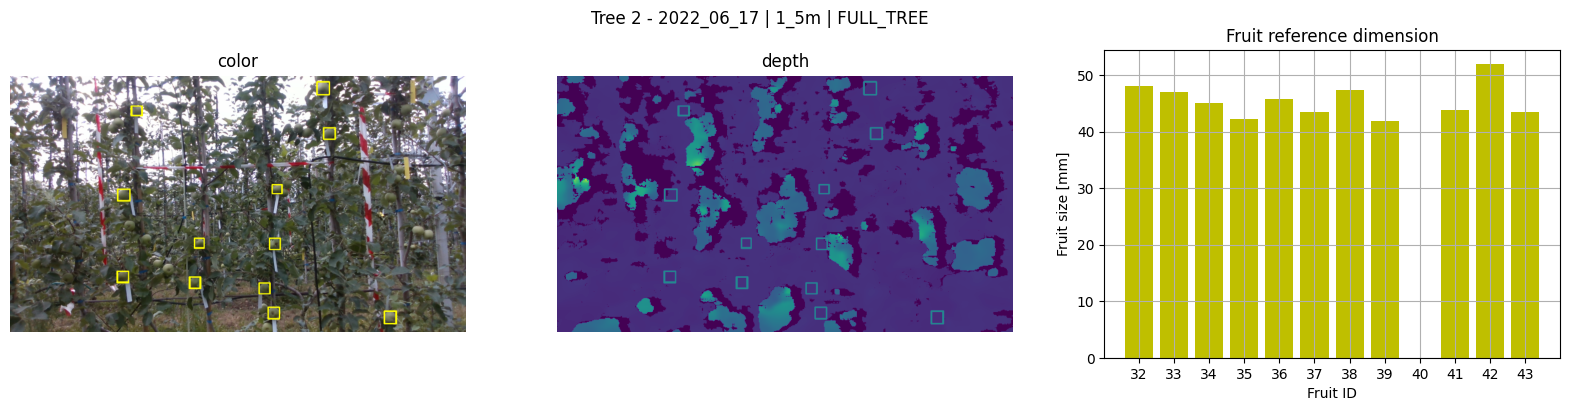

In [102]:
DATE_LIMIT = 1  # out of 17

# reference data
eval_data = pd.read_csv(os.path.join(os.getcwd(), 'data_ground_truth/evaluation_ground_truth_data.csv'))

for cam_obj_distance in os.listdir(os.path.join(os.getcwd(), 'dataset')):
    for point_of_view in os.listdir(os.path.join(os.getcwd(), f'dataset/{cam_obj_distance}')):
        for date in os.listdir(os.path.join(os.getcwd(), f'dataset/{cam_obj_distance}/{point_of_view}'))[:DATE_LIMIT]:
            for file in os.listdir(os.path.join(os.getcwd(), f'dataset/{cam_obj_distance}/{point_of_view}/{date}')):
                if file.endswith('png'):
                    fig, ax = plt.subplots(1,3, figsize=(20, 4))
                    bgr =  cv2.imread(os.path.join(os.getcwd(), f'dataset/{cam_obj_distance}/{point_of_view}/{date}/{file}'))
                    depth_Mat = np.load(os.path.join(os.getcwd(), f'dataset/{cam_obj_distance}/{point_of_view}/{date}/{file[:-4] + ".npy"}'))  # meters
                    json_label = os.path.join(os.getcwd(), f'dataset/{cam_obj_distance}/{point_of_view}/{date}/{file[:-4] + ".json"}')

                    # Open the file in read mode
                    with open(json_label, 'r') as json_label:
                        # Load the JSON data from the file
                        labelled_data = json.load(json_label)

                    # parse data
                    for obj in labelled_data['objects']:
                        if  obj['description'] != '':  # others or unlabelled objects
                            obj_id = obj['description'] 
                            obj_detector = obj['classTitle']
                            obj_coords = obj['points']['exterior']
                            
                            # annotate images
                            bgr = cv2.rectangle(bgr, obj_coords[0], obj_coords[1], (0, 255, 255), thickness= 3)
                            depth_Mat = cv2.rectangle(depth_Mat, obj_coords[0], obj_coords[1], (5, 5, 5), thickness= 3)

                            # get reference fruit size only for manually labelled objects
                            if obj_detector.find('manual') != -1:
                                yyyy, mm, dd = date.split('_')
                                df = eval_data.loc[eval_data.ID == obj_id]     
                                fruit_size = df[f'{dd}/{mm}/{yyyy}'].values  # millimeters
                                ax[2].bar(obj_id, fruit_size, color='y')
                    else:
                        print('finished')                               

                    ax[0].set_title('color')
                    ax[0].imshow(cv2.resize(bgr[:,:,::-1], None, fx=0.5, fy=0.5))
                    ax[0].axis('off')
                    ax[1].set_title('depth')
                    ax[1].imshow(cv2.resize(depth_Mat, None, fx=0.5, fy=0.5))
                    ax[1].axis('off')
                    ax[2].grid()
                    ax[2].set_ylabel('Fruit size [mm]')
                    ax[2].set_xlabel('Fruit ID')
                    ax[2].set_title('Fruit reference dimension')

                    plt.suptitle(f'{"Tree 1" if file.find("P1") != -1 else "Tree 2"} - {date} | {cam_obj_distance} | {point_of_view}')
                    plt.show()